In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Display defaults. I don't know why these values are used, so I won't change them for now
# plt.rcParams['figure.figsize'] = (10, 10) #large images
# plt.rcParams['image.interpolation'] = 'nearest' #don't interpolate: show square pixels
# plt.rcParams['image.cmap'] = 'gray' #Use grayscale instead of color heatmap

%matplotlib inline

In [15]:
def detect_faces(image, video = False):
    height, width, depth = image.shape

    classifier = cv2.CascadeClassifier('Detector_XML/haarcascade_frontalface_alt.xml')

    # Resize image for faster processing only for video
    DOWNSCALE = 1
    if(video):
        DOWNSCALE = 4

    mini_size = (int(width/DOWNSCALE), int(height/DOWNSCALE))
    small_img = cv2.resize(image, mini_size)
    
    # detect and store faces
    faces = classifier.detectMultiScale(small_img)
    
    # Add faces to frame, if any was found
    if(len(faces) > 0):
        for face in faces:
            x, y, w, h = [ coordinate * DOWNSCALE for coordinate in face ]
            # Color in BGR instead of RGB!
            color = (0, 255, 0)
            point1 = (x, y)
            point2 = (x + w, y + h)
            cv2.rectangle(image, point1, point2, color)
    return image, faces

In [16]:
def show_image(img, title):
    plt.imshow(img[:,:,::-1])
    plt.title(title)
    plt.axis('off')

In [17]:
def read_from_webcam():
    capture = cv2.VideoCapture(0)
    while(True):
        ret, frame = capture.read()
        
        # This will be used to show the original image later
        img = frame.copy()

        # Detects and draws a rectangle around the detected faces
        frame, faces = detect_faces(frame, True)
        cv2.imshow('frame', frame)

        # Quit on `q` or `esc`
        pressed_key = cv2.waitKey(1) & 0xFF
        if(pressed_key == ord('q') or pressed_key == 27): #ESCape
            break
    
    capture.release()
    cv2.destroyAllWindows()
    return img, frame, faces

In [18]:
def read_from_file():
    image = cv2.imread('pics/pessoas.jpg')
    frame = image.copy()
    frame, faces = detect_faces(frame)
    return image, frame, faces

In [19]:
def decide_input_form():
    options = {'1': {'label': 'Webcam', 'function': 'read_from_webcam()'},
               '2': {'label': 'File', 'function': 'read_from_file()'},
              }
    while True:
        for key, value in options.iteritems():
            print(' {}: {}'.format(key, value['label']))
        option = raw_input('Choose an input option: ')
        try:
            function = options[str(option)]['function']
            original, detection, faces = eval(function)
            print('\n\n')
            show_image(detection, 'Detection results')
#             show_image(original, 'Original Image')
            print('We found {} faces'.format(len(faces))))
            break
        except:
            print('Invalid option!')

 1: Webcam
 2: File
Choose an input option: 1
We found 1 faces


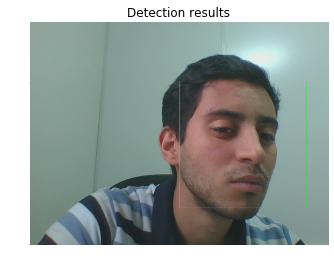

In [21]:
decide_input_form()